# Multipole Preserving comparison for the cinchonidine molecule

Part of the article [Phys. Chem. Chem. Phys., 2015,17, 31582](https://doi.org/10.1039/c5cp01236h), *Multipole-preserving quadratures for the discretization of functions in real-space electronic structure calculations*,
Luigi Genovese and Thierry Deutsch.

We compare the total energy and the ionic charge *i.e.* $\nabla^2V_{local} = -4\pi\rho_{ion}$ calculated with and without the multipole preserving and show the correlation between these two quantities. In the case of multipole preserving, the ionic charge is fully preserved.

First, we extract from a tarfile contained all data, the relevant parameters.

In [1]:
from BigDFT import Logfiles as lf
from futile import Yaml
import tarfile
energies = { 'True': [], 'False': []}
hgrids = {'True': [], 'False': []}
total_charge = {'True': [], 'False': []}
tar = tarfile.open('log-Cinchonidine.tgz')

for member in tar.getmembers():
    f = tar.extractfile(member)
    log = lf.Logfile(dictionary=Yaml.load(stream=f.read()))
    multi = str(log.log['perf']['multipole_preserving'])
    energies[multi].append(log.energy)
    hgrids[multi].append(log.log['dft']['hgrids'])
    total_charge[multi].append(abs(log.log['Total ionic charge']))

The total energy error is given in percent as $100\times\displaystyle\frac{E-E_{ref}}{E_{ref}}$ where $E_{ref}$ is the total energy of the run without multipole preserving *i.e.* using the collocation method for the lowest grid spacing.

In [2]:
import numpy as np
e_ref = energies['False'][0]
per_e = {t: [ 100.*(e-e_ref)/e_ref for e in energies[t]] for t in energies}
per_e = {t: np.array(per_e[t]) for t in energies}

Finally, we use matplotlib to display the curves.

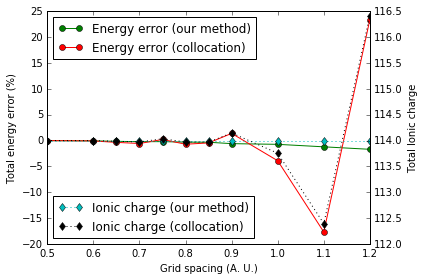

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax1.set_xlim([0.5,1.2])
ax1.set_ylim([-20.,25.])
ax1.set_xlabel('Grid spacing (A. U.)')
ax1.set_ylabel('Total energy error (%)')
ax1.plot(hgrids['True'],per_e['True'],'go-',label='Energy error (our method)')
ax1.plot(hgrids['False'],per_e['False'],'ro-',label='Energy error (collocation)')
ax1.legend(loc=2)

ax2 = ax1.twinx()
ax2.set_xlim([0.5,1.2])
ax2.set_ylim([112,116.5])
ax2.set_ylabel('Total Ionic charge')
ax2.plot(hgrids['True'],total_charge['True'],'cd:',label='Ionic charge (our method)')
ax2.plot(hgrids['False'],total_charge['False'],'kd:',label='Ionic charge (collocation)')
ax2.legend(loc=3)

fig.tight_layout()
plt.show()

In function of the grid discretization, we can see that without multipole preserving the main part of the error for the total energy is incriminated to the error of discretization of the local potential *i.e* the ionic charge.
When the multipoles of the local potential are preserved, the ionic charge has no error by construction and the total energy is improved when the grid spacing increases.

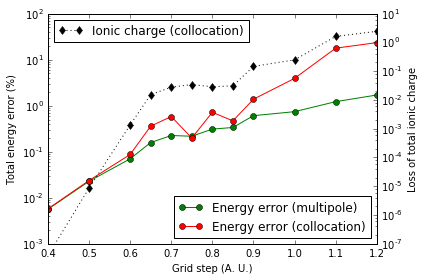

In [4]:
diff_charge = np.array( [ abs(d-total_charge['False'][0]) for d in total_charge['False']] )
fig, ax1 = plt.subplots()

ax1.set_xlim([0.4,1.2])
ax1.set_ylim([0.001,100.])
ax1.set_yscale('log')
ax1.set_xlabel('Grid step (A. U.)')
ax1.set_ylabel('Total energy error (%)')
ax1.plot(hgrids['True'],abs(per_e['True']),'go-',label='Energy error (multipole)')
ax1.plot(hgrids['False'],abs(per_e['False']),'ro-',label='Energy error (collocation)')
ax1.legend(loc=4)

ax2 = ax1.twinx()
ax2.set_xlim([0.4,1.2])
ax2.set_ylim([1.0e-7,10.])
ax2.set_yscale('log')
ax2.set_ylabel('Loss of total ionic charge')
ax2.plot(hgrids['False'],diff_charge,'kd:',label='Ionic charge (collocation)')
ax2.legend(loc=2)

fig.tight_layout()
plt.show()

We represent the same data, especially the loss of the total ionic charge in logarithmic scale. 